In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import pickle
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# with open("goemotions.json", "r") as read_content:
#     file = json.load(read_content)

In [3]:
with open("goemotions.json", "r") as read_content:
    file = pd.read_json(read_content)

In [4]:
# print(file)

Taking count of all sentiment and emotion tags respectively associated with Reddit posts. Then creating a dictionary to create key-value pairings.

In [5]:
sentiment = file[2].value_counts().to_dict()
sentiment_values = sentiment.keys()
sentiment_frequency = sentiment.values()

In [6]:
emotion = file[1].value_counts().to_dict()
emotion_values = emotion.keys()
emotion_frequency = emotion.values()

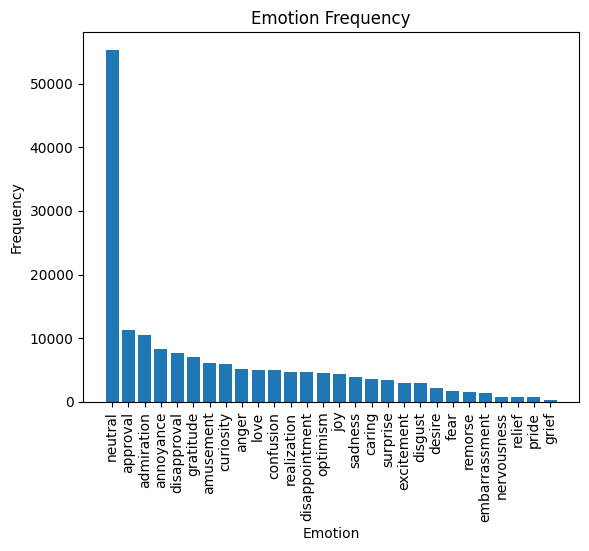

In [7]:
plt.xlabel("Emotion")
plt.ylabel("Frequency")
plt.title("Emotion Frequency")
plt.xticks(rotation= 90) #done for readbility purposes
plt.bar(emotion_values, emotion_frequency)
plt.savefig("bar_emotion.png")
plt.show()


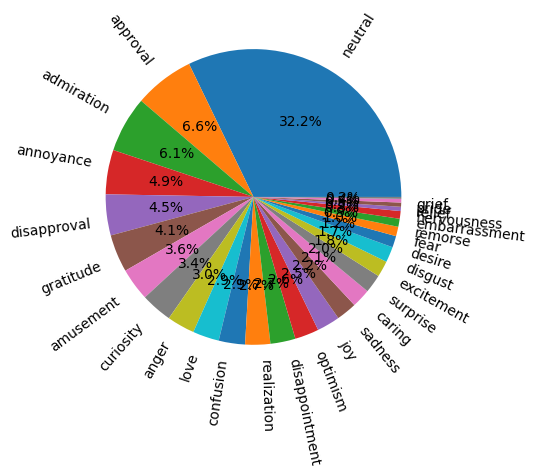

In [8]:
labels = []
sizes = []
for x, y in emotion.items():
    labels.append(x)
    sizes.append(y)
plt.pie(sizes, labels=labels, rotatelabels = True, autopct ='%1.1f%%')
plt.savefig("pie_emotion.png")
plt.show()


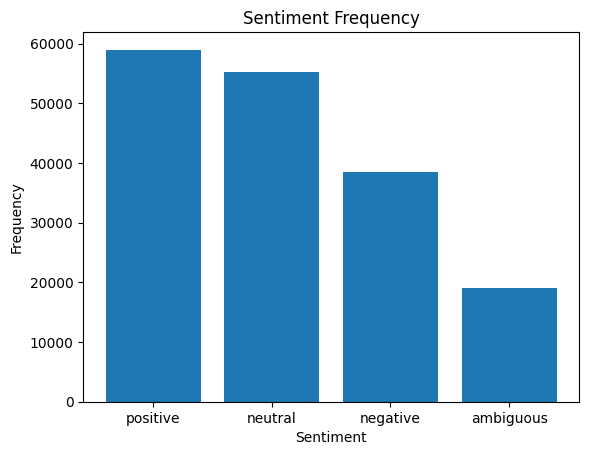

In [9]:
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.title("Sentiment Frequency")
plt.bar(sentiment_values, sentiment_frequency)
plt.savefig("bar_sentiment.png")
plt.show()

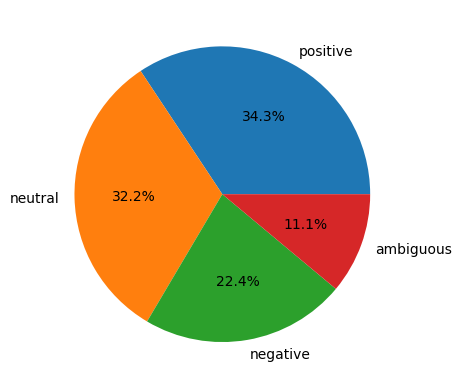

In [10]:
labels = []
sizes = []
for x, y in sentiment.items():
    labels.append(x)
    sizes.append(y)
plt.pie(sizes, labels=labels, autopct ='%1.1f%%')
plt.savefig("pie_sentiment.png")
plt.show()


Plotting of Frequency vs. Emotion and Frequency vs. Sentiment <br>
Source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html <br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html <br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html

<h1>extract tokens/words</h1>

In [11]:
post = file[0].tolist()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(post)
# vectorizer.get_feature_names_out()

In [12]:
print(f"The number of unique words is {len(X.toarray()[0])} unique words")

The number of unique words is 30449 unique words


Given that when X.toarray() is used the occurrences of words in a post is counted for example <br> "This document is the second document."<br> the word document is used twice [0 2 0 1 0 1 1 0 1] mapping to the array of unique words ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
<br>
Sources: <br>
https://stackoverflow.com/questions/27488446/how-do-i-get-word-frequency-in-a-corpus-using-scikit-learn-countvectorizer
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [13]:
post = file[0]
vectorizer = CountVectorizer()
#vectorize posts into words that were used
# file[0] = vectorizer.fit_transform(post)
X = vectorizer.fit_transform(file[0])
# X_features =vectorizer.get_feature_names_out()

le = preprocessing.LabelEncoder()
file[1] = le.fit_transform(file[1]) #change 0 to the column of emotions with no separation 
#vectorize sentiments
file[2] = le.fit_transform(file[2]) #change 0 to the column of sentiment with no separation 


In [14]:
#Question 2.2
X_train,X_test,yemo_train, yemo_test,ysent_train, ysent_test = train_test_split(X,file[1],file[2], test_size = 0.2, train_size=0.8)

<h2>Multinomial Naive Bayes Classifier (naive bayes.MultinomialNB.html)
with the default parameters.</h2>

In [15]:
classifier = MultinomialNB()

In [16]:
# model = classifier.fit(X_train, yemo_train,ysent_train)
# with open('models/MNB_model.pickle','wb') as f:
#         pickle.dump(classifier, f)

In [17]:
#saves time by not training
pickle_in = open('models/MNB_model.pickle','rb')
clf1 = pickle.load(pickle_in)

In [18]:
# clf1.predict(X_test)
print(f"Score for Emotion: {clf1.score(X_test,yemo_test)}")
print(f"Score for Sentiment: {clf1.score(X_test,ysent_test)}")

Score for Emotion: 0.4513444302176697
Score for Sentiment: 0.012804097311139564


<h2>cross validation</h2>
<body>from sklearn.model_selection import cross_val_score</body>

<h2>Decision Tree (tree.DecisionTreeClassifier) with the default parameters.</h2>

In [19]:
classifier = DecisionTreeClassifier()

In [20]:
# classifier = classifier.fit(X_train, yemo_train,ysent_train)
# with open('models/DT_model.pickle','wb') as f:
#         pickle.dump(classifier, f)

In [21]:
pickle_in = open('models/DT_model.pickle','rb')
clf2 = pickle.load(pickle_in)

In [22]:
print(f"Score for Emotion: {clf2.score(X_test,yemo_test)}")
print(f"Score for Sentiment: {clf2.score(X_test,ysent_test)}")

Score for Emotion: 0.5699860318938424
Score for Sentiment: 0.014666511465487139


<h2>Multi-Layered Perceptron (neural network.MLPClassifier) with the default parameters.</h2>

In [23]:

classifier = MLPClassifier()

In [24]:
# MLP1 = classifier.fit(X_train, yemo_train)
# with open('models/MLP1_model.pickle','wb') as f:
#         pickle.dump(classifier, f)
# MLP2 = classifier.fit(X_train,ysent_train)
# with open('models/MLP2_model.pickle','wb') as f:
#         pickle.dump(classifier, f)

In [25]:
pickle_in = open('models/MLP1_model.pickle','rb')
clf3 = pickle.load(pickle_in)
pickle_in = open('models/MLP2_model.pickle','rb')
clf4 = pickle.load(pickle_in)


In [26]:
print(f"Score for Emotion: {clf3.score(X_test,yemo_test)}")
print(f"Score for Sentiment: {clf4.score(X_test,ysent_test)}")

Score for Emotion: 0.5649225934117099
Score for Sentiment: 0.7110057036433477


<h2>Multinomial Naive Bayes Classifier found using GridSearchCV</h2>

input parameter requires a model object

using the following alpha parameters 0.5,0,0.36,1


In [27]:
parameters = {"alpha":(0.5,0,0.36,1)}
clfMNB = MultinomialNB()

clf = GridSearchCV(estimator=clfMNB, param_grid=parameters,n_jobs=-1)
# clf.fit(X_train, yemo_train)
# with open('models/MNB1GridCV_model.pickle','wb') as f:
#         pickle.dump(clf, f)
#
#
# clf.fit(X_train, ysent_train)
# with open('models/MNB2GridCV_model.pickle','wb') as f:
#         pickle.dump(clf, f)

In [28]:
pickle_in = open('models/MNB1GridCV_model.pickle','rb')
clf4 = pickle.load(pickle_in)
pickle_in = open('models/MNB2GridCV_model.pickle','rb')
clf5 = pickle.load(pickle_in)
print(f"Best estimator (Emotion): {clf4.best_estimator_}, Best Score: {clf5.best_score_}")
print(f"Best estimator (Sentiment): {clf5.best_estimator_}, Best Score: {clf5.best_score_}")

Best estimator (Emotion): MultinomialNB(alpha=0.36), Best Score: 0.5383904367141189
Best estimator (Sentiment): MultinomialNB(alpha=1), Best Score: 0.5383904367141189


<h2>Decision Tree Classifier found using GridSearchCV</h2>

input parameter requires a model object

using the various value for the following parameters: criterion, max_depth, min_samples


In [29]:
parameters = {"criterion":("gini","entropy"),"max_depth":(100,3),"min_samples_split":(12,5,30)}
clfDT = DecisionTreeClassifier()

clf = GridSearchCV(estimator=clfDT, param_grid=parameters,n_jobs=-1)
# clf.fit(X_train, yemo_train)
# with open('models/DT1GridCV_model.pickle','wb') as f:
#         pickle.dump(clf, f)
#
# clf.fit(X_train, ysent_train)
# with open('models/DT2GridCV_model.pickle','wb') as f:
#         pickle.dump(clf, f)


In [30]:
pickle_in = open('models/DT1GridCV_model.pickle','rb')
clf6 = pickle.load(pickle_in)
pickle_in = open('models/DT2GridCV_model.pickle','rb')
clf7 = pickle.load(pickle_in)
print(f"Best estimator (Emotion): {clf6.best_estimator_}, Best Score: {clf6.best_score_}")
print(f"Best estimator (Sentiment): {clf7.best_estimator_}, Best Score: {clf7.best_score_}")

Best estimator (Emotion): DecisionTreeClassifier(max_depth=100, min_samples_split=30), Best Score: 0.4044639513068846
Best estimator (Sentiment): DecisionTreeClassifier(max_depth=100, min_samples_split=5), Best Score: 0.515219404662324


<h2>Multi-Layered Perceptron found using GridSearchCV</h2>

input parameter requires a model object

using the various value for the following parameters: activation, architectures, solvers
Hidden layers <a href="https://datascience.stackexchange.com/questions/19768/how-to-implement-pythons-mlpclassifier-with-gridsearchcv">Link</a>


In [ ]:
parameters = {"activation":("identity", "logistic", "tanh", "relu"),"hidden_layer_sizes":((5,5),(5,10)), "solver":("adam","sgd")}
#currently 5 neurons then 5 neurons and 5 neurons then 10 neurons in the hidden layer
clfMLP = MLPClassifier()

clf = GridSearchCV(estimator=clfMLP, param_grid=parameters,n_jobs=-1)
clf.fit(X_train, yemo_train)
with open('models/MLP1GridCV_model.pickle','wb') as f:
        pickle.dump(clf, f)

clf.fit(X_train, ysent_train)
with open('models/MLP2GridCV_model.pickle','wb') as f:
        pickle.dump(clf, f)

In [ ]:
pickle_in = open('models/MLP1GridCV_model.pickle','rb')
clf1 = pickle.load(pickle_in)
pickle_in = open('models/MLP2GridCV_model.pickle','rb')
clf2 = pickle.load(pickle_in)
print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
# print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")